# Support vector Machines

Support Vector Machines (SVM) is a `supervised machine learning algorithm` which can be used for both classification or regression challenges. 

However,  it is mostly used in classification problems. 

In this algorithm, we plot each data item as a point in n-dimensional space (where n is number of features you have) with the value of each feature being the value of a particular coordinate. Then, we perform classification by finding the hyper-plane that differentiate the two classes very well (look at the below snapshot).

Types of SVM kernels:

1. Linear Kernel
2. Polynomial Kernel
3. Radial Basis Function Kernel (RBF)

In [154]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ml libraries
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

In [155]:
# import the data
df = sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [156]:
df['species'].value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

In [157]:
# lets make X and y in our data
X = df.drop('species', axis=1)
y = df['species']

In [158]:
# train test split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [159]:
# call the model
model = SVC(kernel='rbf')
# train the model
model.fit(X_train, y_train)
# predict the model
y_pred = model.predict(X_test)

In [160]:
# evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



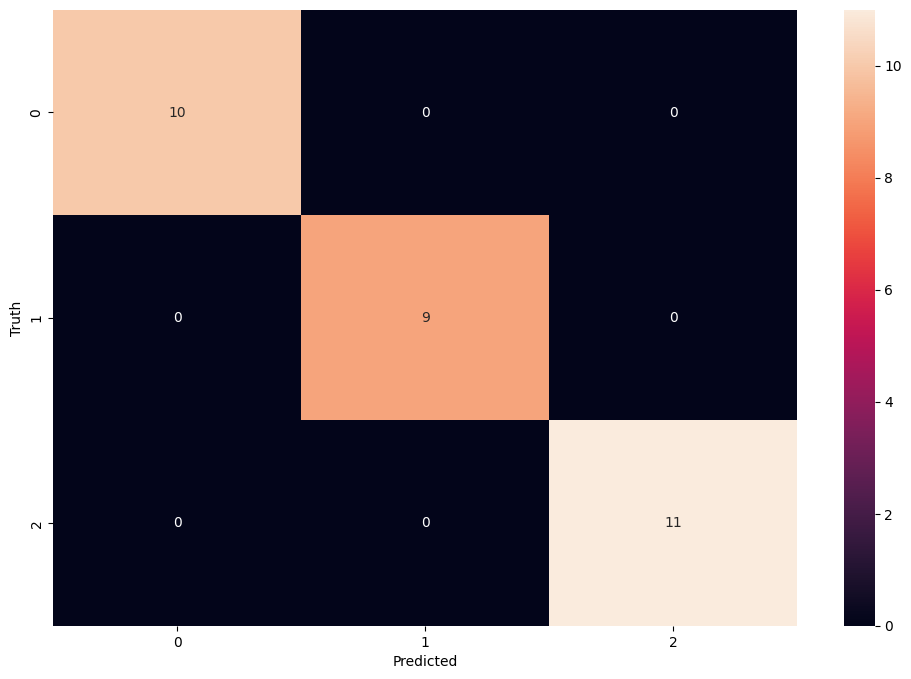

In [161]:
# draw the confusion matrix using heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)
# label the plot
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

----
# SVR
Support Vector Machine can also be used as a regression method, maintaining all the main features that characterize the algorithm (maximal margin).

In [162]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ml libraries
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [163]:
# import the dataset
df = sns.load_dataset('tips')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [164]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [165]:
# Encode categorical variables
encoder = LabelEncoder()
for col in df.columns:
    if df[col].dtype == 'object' or df[col].dtype.name == 'category':
        df[col] = encoder.fit_transform(df[col])

# Display the modified DataFrame
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,0,0,2,0,2
1,10.34,1.66,1,0,2,0,3
2,21.01,3.50,1,0,2,0,3
3,23.68,3.31,1,0,2,0,2
4,24.59,3.61,0,0,2,0,4


In [166]:
# lets make X and y in our data
X = df.drop('tip', axis=1)
y = df['tip']

In [167]:
# train test split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [168]:
# Standardize the features (important for SVR)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [169]:
# call the model
model = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1)

In [170]:
# train the model
model.fit(X_train_scaled, y_train)

SVR(C=100, gamma=0.1)

In [171]:
# prediction
y_pred = model.predict(X_test_scaled)

In [172]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print results
print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")

Mean Squared Error: 1.00
R² Score: 0.20


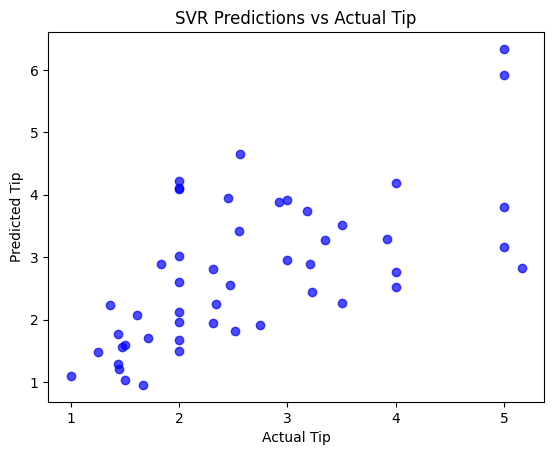

In [173]:
# Plot actual vs predicted tips
plt.scatter(y_test, y_pred, alpha=0.7, color="blue")
plt.xlabel("Actual Tip")
plt.ylabel("Predicted Tip")
plt.title("SVR Predictions vs Actual Tip")
plt.show()